In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
df=pd.read_csv('ipl.csv')
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [5]:
df.isnull().sum().sum()

0

In [6]:
df_1=df.drop_duplicates('mid')
df_1.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
124,2,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,Kings XI Punjab,PA Patel,B Lee,0,0,0.1,0,0,0,0,240
248,3,2008-04-19,Feroz Shah Kotla,Rajasthan Royals,Delhi Daredevils,T Kohli,GD McGrath,0,0,0.1,0,0,0,0,129
370,4,2008-04-20,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,L Ronchi,P Kumar,0,0,0.1,0,0,0,0,165
493,5,2008-04-20,Eden Gardens,Deccan Chargers,Kolkata Knight Riders,AC Gilchrist,AB Dinda,1,0,0.1,1,0,1,0,110


In [7]:
df_1['date'] = pd.to_datetime(df_1['date'])

In [8]:
df_1['date'].info()

<class 'pandas.core.series.Series'>
Int64Index: 617 entries, 0 to 75889
Series name: date
Non-Null Count  Dtype         
--------------  -----         
617 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 9.6 KB


In [9]:
df_1['venue'].nunique()

35

In [10]:
df_1['bat_team'].nunique()

14

In [11]:
df_1['bowl_team'].nunique()

14

In [12]:
df_1['total'].describe()

count    617.000000
mean     160.325770
std       29.659089
min       67.000000
25%      141.000000
50%      161.000000
75%      181.000000
max      263.000000
Name: total, dtype: float64

In [13]:
venues=df_1['venue'].unique()

In [14]:
for i in venues:
    print(i,'-',round(df_1[df_1['venue']==i]['total'].mean()))

M Chinnaswamy Stadium - 168
Punjab Cricket Association Stadium, Mohali - 163
Feroz Shah Kotla - 165
Wankhede Stadium - 164
Eden Gardens - 156
Sawai Mansingh Stadium - 156
Rajiv Gandhi International Stadium, Uppal - 157
MA Chidambaram Stadium, Chepauk - 166
Dr DY Patil Sports Academy - 147
Newlands - 145
St George's Park - 159
Kingsmead - 152
SuperSport Park - 152
Buffalo Park - 147
New Wanderers Stadium - 144
De Beers Diamond Oval - 158
OUTsurance Oval - 135
Brabourne Stadium - 180
Sardar Patel Stadium, Motera - 163
Barabati Stadium - 168
Vidarbha Cricket Association Stadium, Jamtha - 149
Himachal Pradesh Cricket Association Stadium - 176
Nehru Stadium - 151
Holkar Cricket Stadium - 157
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium - 160
Subrata Roy Sahara Stadium - 148
Shaheed Veer Narayan Singh International Stadium - 146
JSCA International Stadium Complex - 149
Sheikh Zayed Stadium - 147
Sharjah Cricket Stadium - 158
Dubai International Cricket Stadium - 149
Maharashtra Cricke

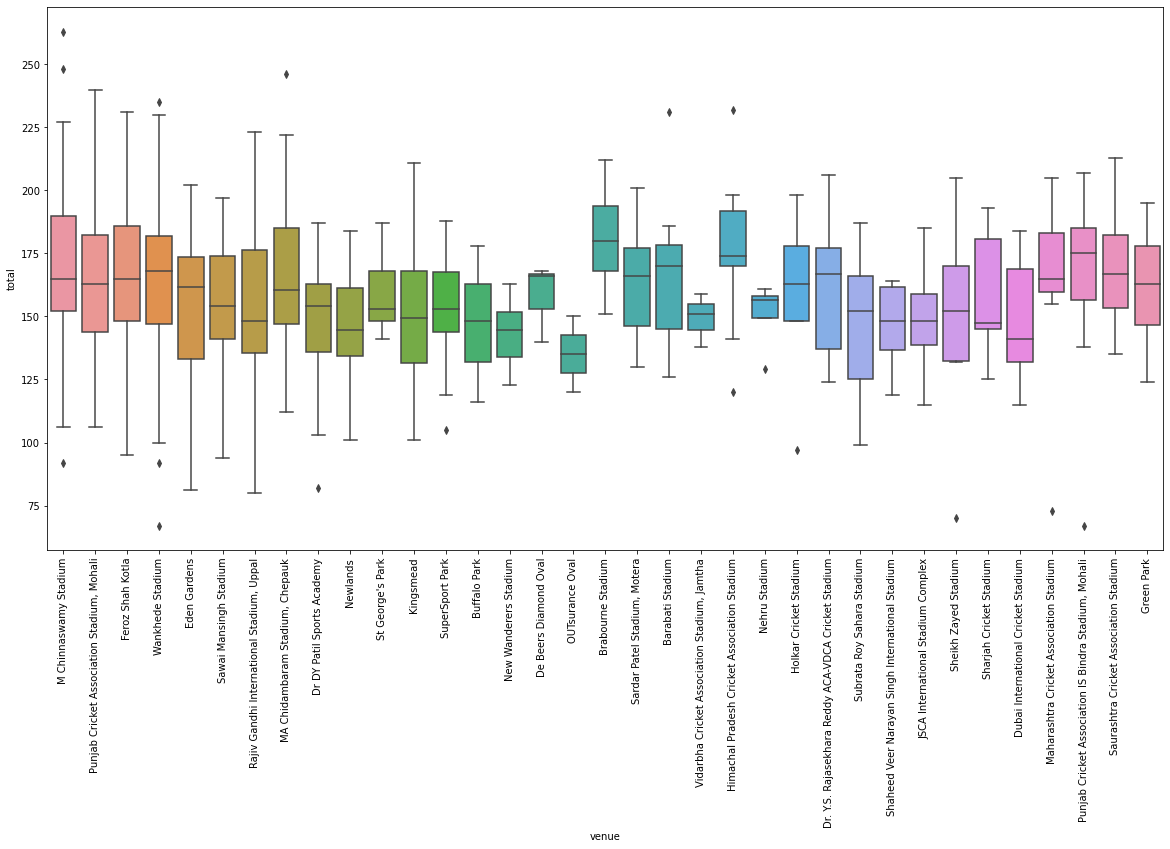

In [15]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df_1,x='venue',y='total')
plt.xticks(rotation=90)
plt.show()

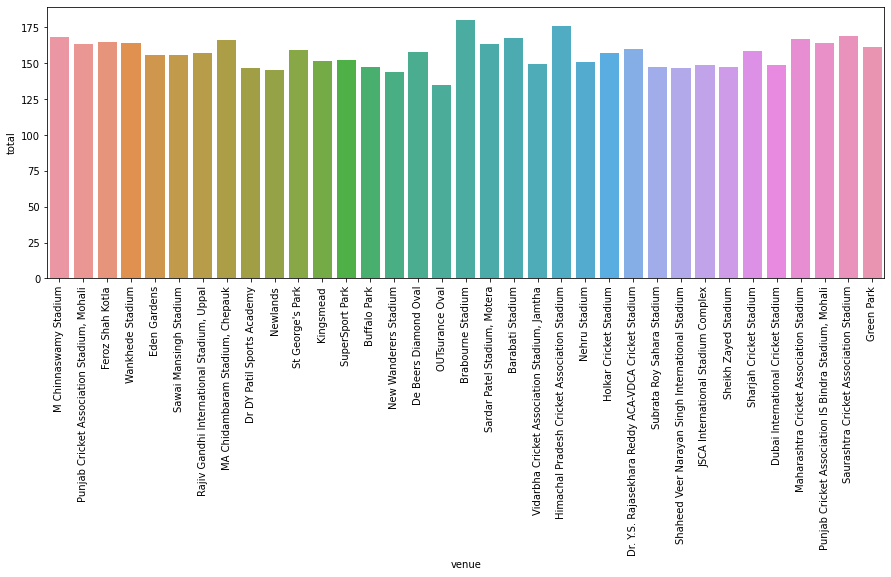

In [16]:
plt.figure(figsize=(15,5))
sns.barplot('venue','total',data=df_1,ci=False)
plt.xticks(rotation=90)
plt.show()

In [17]:
df_1['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [18]:
df_1=df_1.replace('Rising Pune Supergiant','Rising Pune Supergiants')

In [19]:
batting_side=df_1['bat_team'].unique()

In [20]:
df_1['bat_team'].nunique()

13

In [21]:
for i in batting_side:
    print(i,'-',round(df_1[df_1['bat_team']==i]['total'].mean()))

Kolkata Knight Riders - 156
Chennai Super Kings - 166
Rajasthan Royals - 157
Mumbai Indians - 163
Deccan Chargers - 157
Kings XI Punjab - 160
Royal Challengers Bangalore - 166
Delhi Daredevils - 155
Kochi Tuskers Kerala - 144
Pune Warriors - 149
Sunrisers Hyderabad - 163
Rising Pune Supergiants - 166
Gujarat Lions - 162


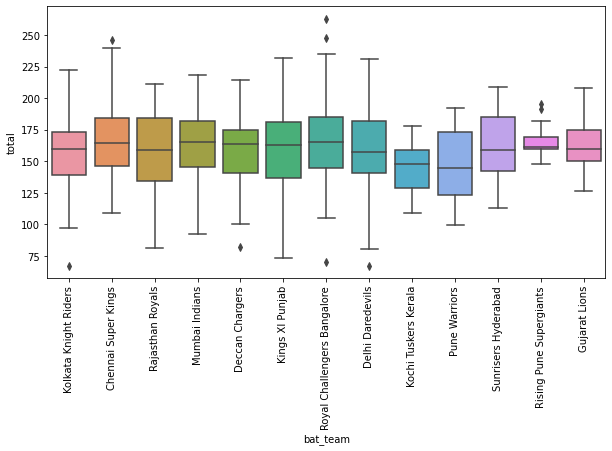

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_1,x='bat_team',y='total')
plt.xticks(rotation=90)
plt.show()

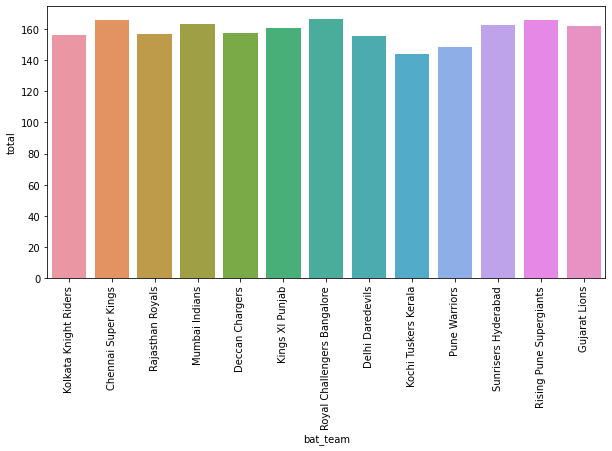

In [23]:
plt.figure(figsize=(10,5))
sns.barplot('bat_team','total',data=df_1,ci=False)
plt.xticks(rotation=90)
plt.show()

In [24]:
bowling_side=df_1['bowl_team'].unique()

In [25]:
for i in bowling_side:
    print(i,'-',round(df_1[df_1['bowl_team']==i]['total'].mean()))

Royal Challengers Bangalore - 162
Kings XI Punjab - 167
Delhi Daredevils - 163
Kolkata Knight Riders - 155
Rajasthan Royals - 157
Mumbai Indians - 159
Chennai Super Kings - 160
Deccan Chargers - 163
Pune Warriors - 157
Kochi Tuskers Kerala - 143
Sunrisers Hyderabad - 157
Rising Pune Supergiants - 156
Gujarat Lions - 174


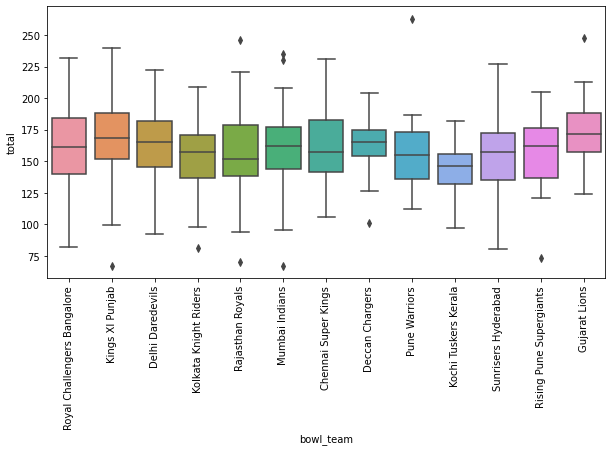

In [26]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_1,x='bowl_team',y='total')
plt.xticks(rotation=90)
plt.show()

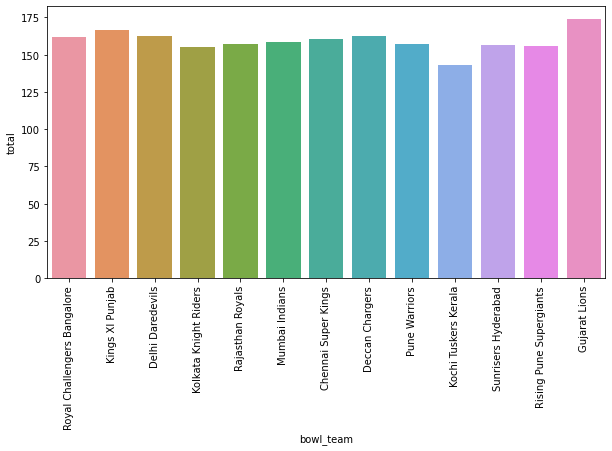

In [27]:
plt.figure(figsize=(10,5))
sns.barplot('bowl_team','total',data=df_1,ci=False)
plt.xticks(rotation=90)
plt.show()

In [28]:
year=[]
for i in df_1['date']:
    year.append(i.year)

df_1['year']=year

In [29]:
years=df_1['year'].unique()

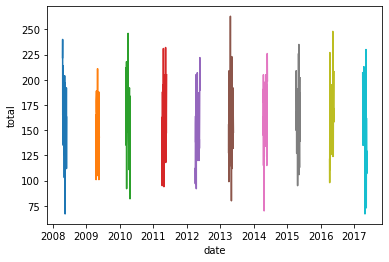

In [43]:
for i in years:
    df_x=df_1[df_1['year']==i]
    sns.lineplot(data=df_x.drop_duplicates('date'),x='date',y='total')
    fig.show()

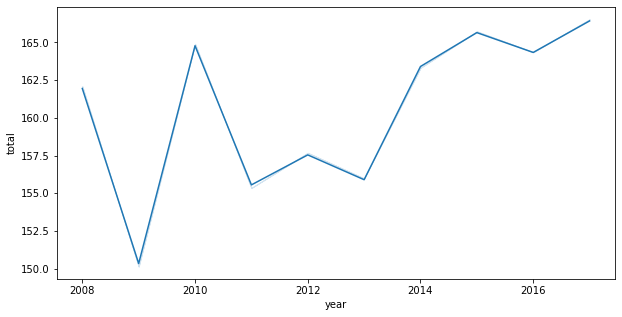

In [44]:
plt.figure(figsize=(10,5))
sns.lineplot('year','total',data=df_1,ci=False)
plt.show()

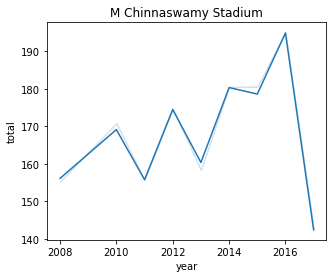

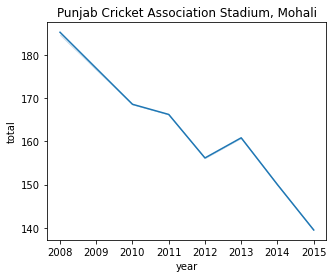

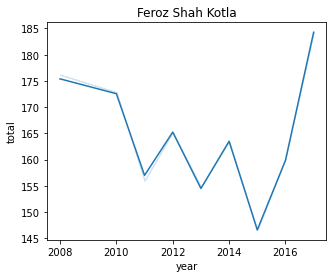

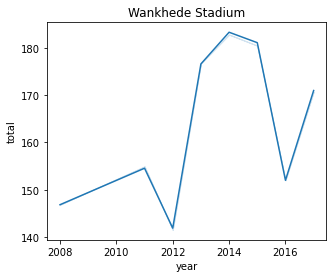

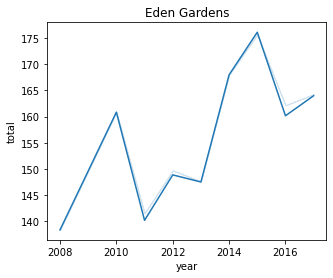

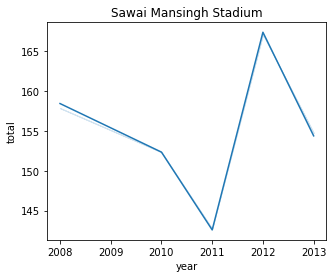

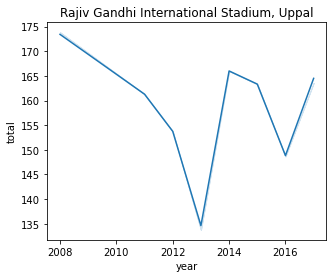

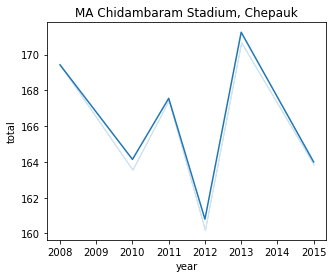

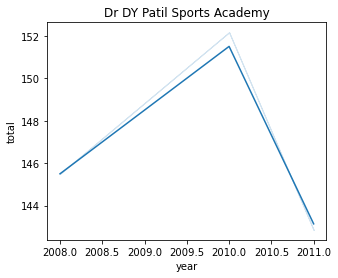

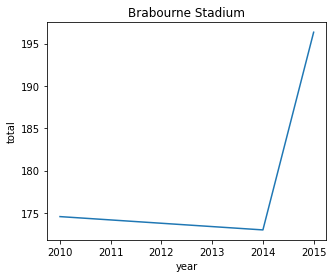

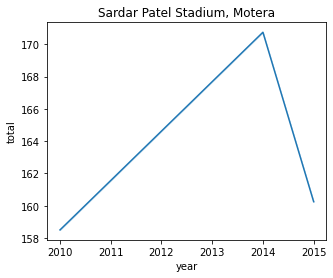

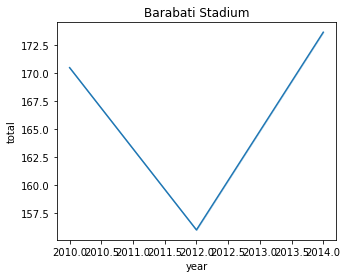

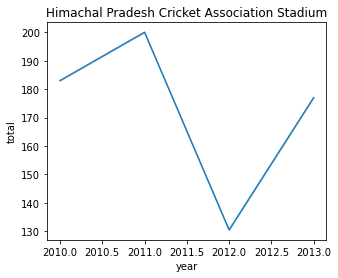

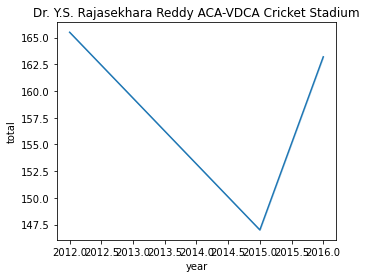

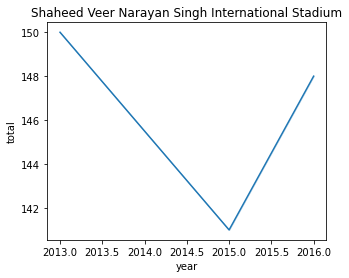

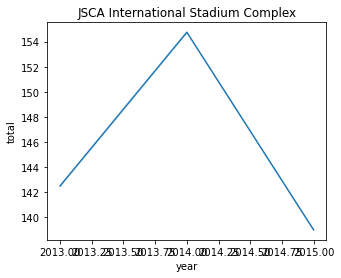

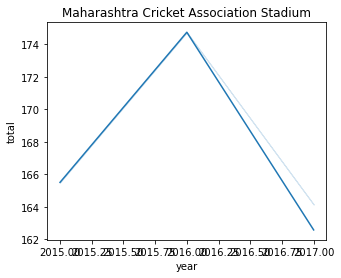

In [45]:
for i in venues:
    df_x=df_1[df_1['venue']==i]
    if(df_x['year'].nunique() >= 3):
        plt.figure(figsize=(5,4))
        sns.lineplot('year','total',data=df_x,ci=False).set(title=i)
        plt.show()

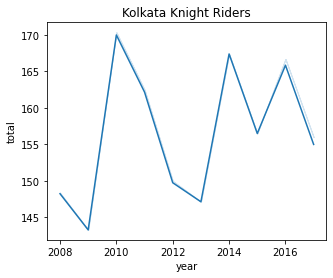

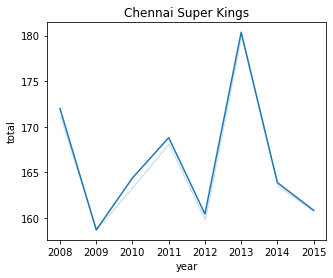

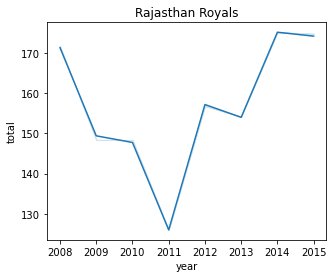

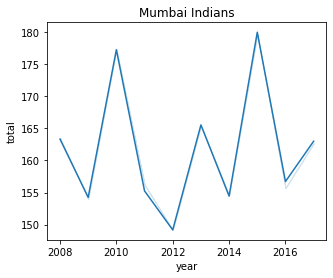

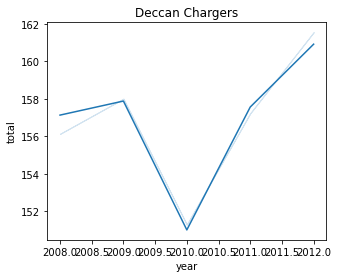

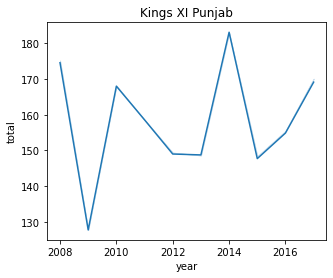

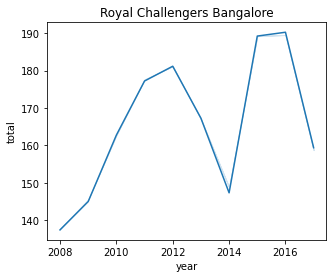

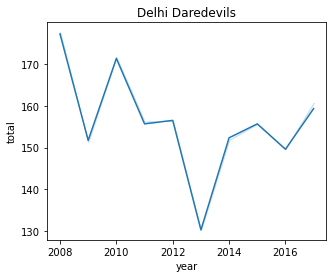

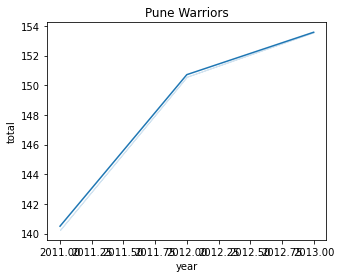

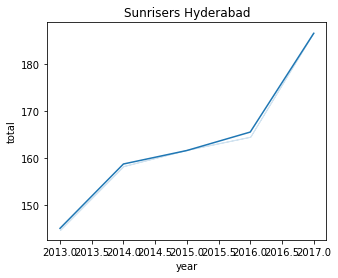

In [46]:
for i in batting_side:
    df_x=df_1[df_1['bat_team']==i]
    if(df_x['year'].nunique() >= 3):
        plt.figure(figsize=(5,4))
        sns.lineplot('year','total',data=df_x,ci=False).set(title=i)
        plt.show()

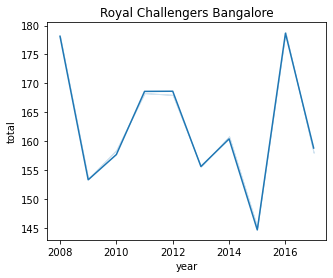

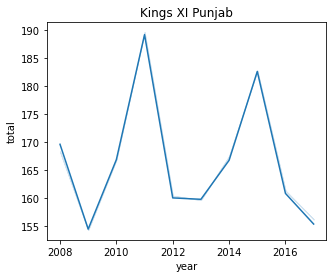

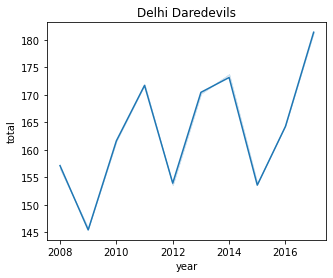

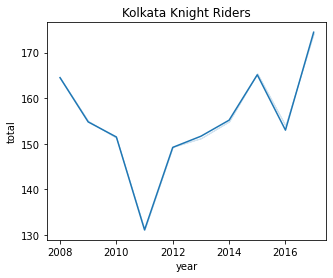

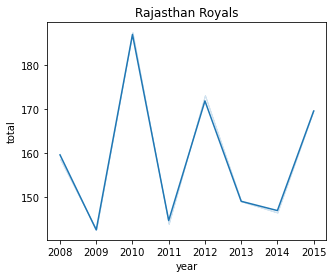

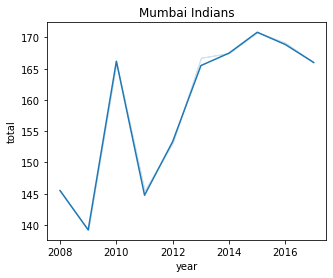

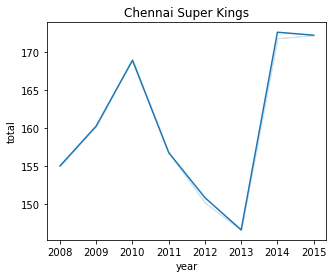

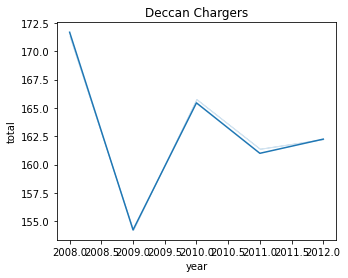

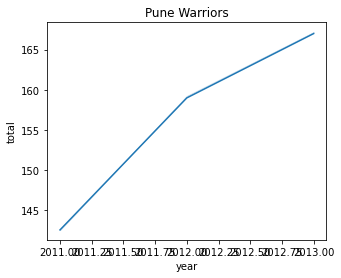

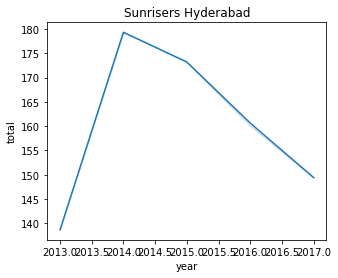

In [47]:
for i in bowling_side:
    df_x=df_1[df_1['bowl_team']==i]
    if(df_x['year'].nunique() >= 3):
        plt.figure(figsize=(5,4))
        sns.lineplot('year','total',data=df_x,ci=False).set(title=i)
        plt.show()

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categ=['venue','bat_team','bowl_team']
df_1[categ] = df_1[categ].apply(le.fit_transform)

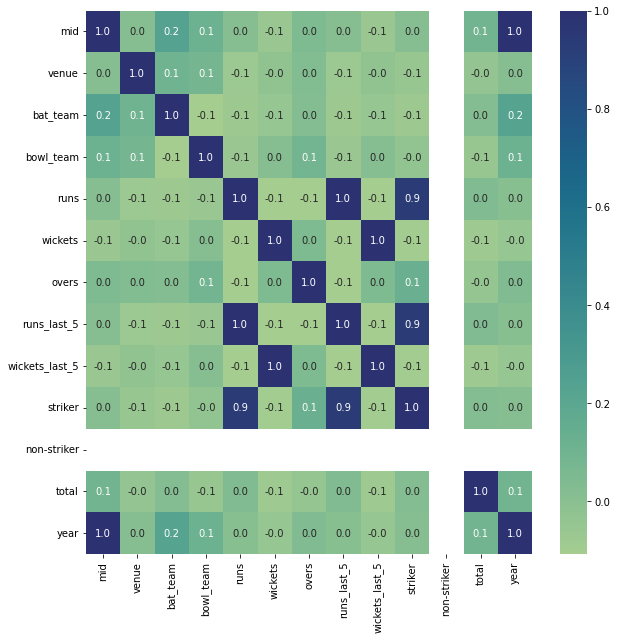

In [49]:
plt.figure(figsize=(10,10))
sns.heatmap(df_1.drop(['date','batsman','bowler'],axis=1).corr(),annot=True,cmap="crest",fmt=".1f")
plt.show()